<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [18]:
import pandas as pd
df = pd.read_csv('Advertising.zip')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [19]:
df.isna().value_counts()


Unnamed: 0  TV     radio  newspaper  sales
False       False  False  False      False    200
dtype: int64

In [20]:
df = df.drop(columns = 'Unnamed: 0')

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [83]:
X = np.column_stack([df['TV'], df['radio'], df['newspaper']])
y = np.array([df['sales']])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [84]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [85]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))
X

array([[0.07071068, 0.09561706, 0.09692057, 0.13052034],
       [0.07071068, 0.01849178, 0.10076663, 0.08506456],
       [0.07071068, 0.00714739, 0.11768927, 0.13070895],
       [0.07071068, 0.06295517, 0.1058947 , 0.11033873],
       [0.07071068, 0.07513066, 0.02769159, 0.11015011],
       [0.07071068, 0.00361525, 0.12538138, 0.1414599 ],
       [0.07071068, 0.02389388, 0.08410039, 0.0443241 ],
       [0.07071068, 0.04994859, 0.05025511, 0.02187913],
       [0.07071068, 0.00357369, 0.00538448, 0.00188613],
       [0.07071068, 0.08302603, 0.00666649, 0.039986  ],
       [0.07071068, 0.02746757, 0.01487141, 0.0456444 ],
       [0.07071068, 0.08921766, 0.06153687, 0.00754453],
       [0.07071068, 0.00988999, 0.08999767, 0.1242961 ],
       [0.07071068, 0.0405157 , 0.01948668, 0.01358015],
       [0.07071068, 0.08481287, 0.08435679, 0.08676207],
       [0.07071068, 0.08119763, 0.12230453, 0.09977639],
       [0.07071068, 0.028174  , 0.09384373, 0.21501905],
       [0.07071068, 0.11693456,

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [91]:
num_iters = 1000
m = 200
n = 4
w = np.zeros(X.shape[1])

for i in range(num_iters):

    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = ((X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:]))
        h = h.reshape(-1, 1)
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k] @ (y-h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2/(len(y))
print(w)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [92]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [94]:
X = np.column_stack([df['TV'], df['radio'], df['newspaper']])
y = np.array([df['sales']])
X_cent = X - X.mean()
X_st = X_cent/np.linalg.norm(X_cent, axis=0)

**Добавим единичный столбец**

In [95]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [114]:
def mse_error (y, y_pred):
  mse = round((sum((y - y_pred)**2)[0])/float(y.shape[0]), 3)
  return mse 

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [115]:
y_pred1 = np.array([np.mean(y)]*y.shape[1]).reshape((-1, 1))

print(mse_error(y, y_pred1))

13049.201


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [117]:
def lin_pred(X, w):
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [181]:
def stoch_grad_step(X, y, w, train_ind, eta):
    x_k = X[train_ind, :]
    y_k = y[train_ind]
    y_pred = np.dot(x_k, w)
    l = X.shape[0]
    return w - (2*eta/l)*(y_k - y_pred)*x_k

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [185]:
def stochastic_gradient_descent(X, y, w=[0,0,0,0], eta=0.01, max_iter=1000, min_weight_dist=0.001):

    weight_dist = np.inf
    w=w
    errors = []
    iter_num = 0
        

    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[1])
        old_w = w
        w = stoch_grad_step(X, y, w, random_ind, eta=eta)
        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mse_error(y, np.dot(X, w)))
        iter_num += 1        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [192]:
y = y.T

w, errors = stochastic_gradient_descent(X, y, w= [0,0,0,0], eta=0.01, max_iter=100000, min_weight_dist=0.001)
print(stochastic_gradient_descent(X, y, w= [0,0,0,0], eta=0.01, max_iter=100000, min_weight_dist=0.001))

<ipython-input-114-e98ebd4edef8>:2: RuntimeWarning: overflow encountered in add
  mse = round((sum((y - y_pred)**2)[0])/float(y.shape[0]), 3)
<ipython-input-114-e98ebd4edef8>:2: RuntimeWarning: overflow encountered in square
  mse = round((sum((y - y_pred)**2)[0])/float(y.shape[0]), 3)
<ipython-input-185-e3fa9edc6691>:13: RuntimeWarning: invalid value encountered in subtract
  weight_dist = np.linalg.norm(w - old_w)
<ipython-input-114-e98ebd4edef8>:2: RuntimeWarning: overflow encountered in multiply
  mse = round((sum((y - y_pred)**2)[0])/float(y.shape[0]), 3)


(array([-inf, -inf, -inf, -inf]), [592.458, 2243.871, 50231.585, 2552080.014, 36888964.469, 72250695.253, 150687366.485, 329421222.723, 15770610428.479, 23022770956.361, 346614968180.619, 5075635270507.98, 7639120697578.531, 116385048140987.72, 5567549727725905.0, 7.945020523113904e+16, 1.5514692742839462e+17, 2.494544645054653e+17, 1.1933220095592985e+19, 1.7519383640053873e+19, 8.380794315952511e+20, 1.6100797796412899e+21, 2.54887605138195e+21, 3.953597901389941e+22, 1.8912931752166975e+24, 2.705169963497921e+24, 4.0399247208895915e+25, 6.1851486583668935e+25, 1.0941519500834951e+26, 2.2279138518523564e+26, 1.0657730927084923e+28, 1.5518928997044359e+29, 3.0664071946223225e+29, 1.466885389933757e+31, 7.017178771869116e+32, 3.3568265287988446e+34, 6.326242985834291e+34, 9.286358837616337e+35, 1.350975017622087e+37, 1.960787725513699e+38, 2.9289109836044257e+38, 5.047804219469946e+38, 1.0035089170492824e+39, 2.661068874134591e+39, 5.691893834977844e+39, 1.578915222791148e+40, 2.625791

**Постройте график зависимости ошибки от номера итерации**

NameError: ignored

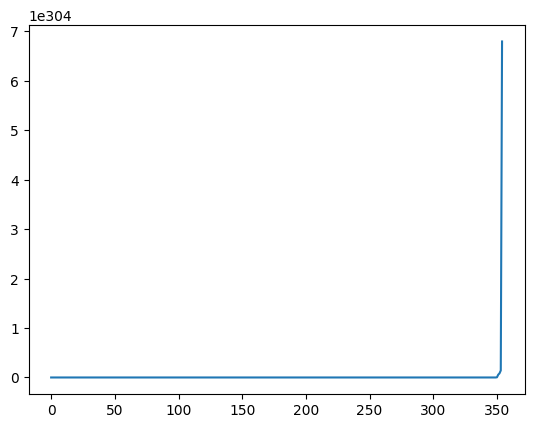

In [195]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(errors)), errors)
xlabel('Iteration number')
ylabel('MSE')

**Выведите вектор весов, к которому сошелся метод.**

In [163]:
w, err  = stochastic_gradient_descent(X, y, w= [1,1,1,1], eta=0.01, max_iter=100000, min_weight_dist=0.000001)
print(w)

[nan nan nan nan]


<ipython-input-114-e98ebd4edef8>:2: RuntimeWarning: overflow encountered in square
  mse = round((sum((y - y_pred)**2)[0])/float(y.shape[0]), 3)
<ipython-input-114-e98ebd4edef8>:2: RuntimeWarning: overflow encountered in add
  mse = round((sum((y - y_pred)**2)[0])/float(y.shape[0]), 3)
<ipython-input-124-bdd92f17775f>:6: RuntimeWarning: invalid value encountered in add
  return w + (2*eta/l)*(y_k - y_pred)*x_k


**Выведите среднеквадратичную ошибку на последней итерации.**

In [ ]:
# ваш код